In [ ]:
from google.colab import files
files.upload()

Saving Medical_insurance.csv to Medical_insurance.csv


{'Medical_insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Ridge
from sklearn .metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline


In [ ]:
df=pd.read_csv("Medical_insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Charges variable has more than 2 decimal places , to update that:

In [ ]:
df["charges"]=np.round(df["charges"],2)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.47
4,32,male,28.880,0,no,northwest,3866.86


In [ ]:
df.shape

(2772, 7)

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.replace("?",np.nan,inplace=True)

Check Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Exploratory Data Analysis (EDA)

Regression plot for charges w.r.t. BMI

(0.0, 66902.85800000001)

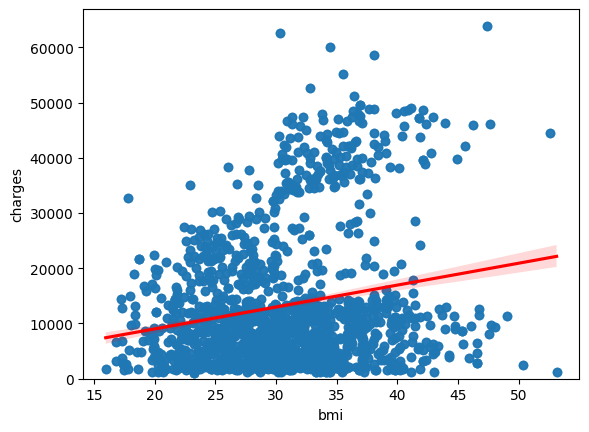

In [ ]:
sns.regplot(x="bmi",y="charges",data=df,line_kws={"color":"red"})
plt.ylim(0,)

Box plot for charges w.r.t Smoker

Text(0, 0.5, 'charges')

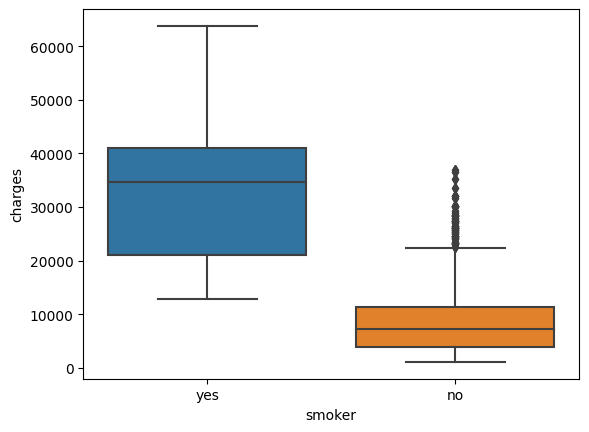

In [ ]:
sns.boxplot(x="smoker",y="charges",data=df)
plt.xlabel("smoker")
plt.ylabel("charges")

Correlation matrix

In [ ]:
df.corr()

<ipython-input-22-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


Text(0, 0.5, 'Value')

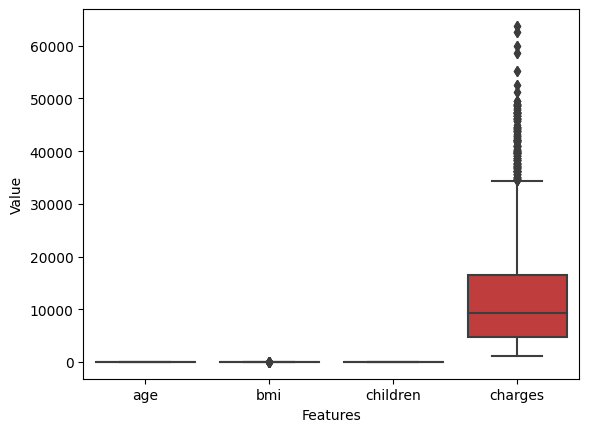

In [ ]:
sns.boxplot(df)
plt.xlabel("Features")
plt.ylabel("Value")

Bar Plot

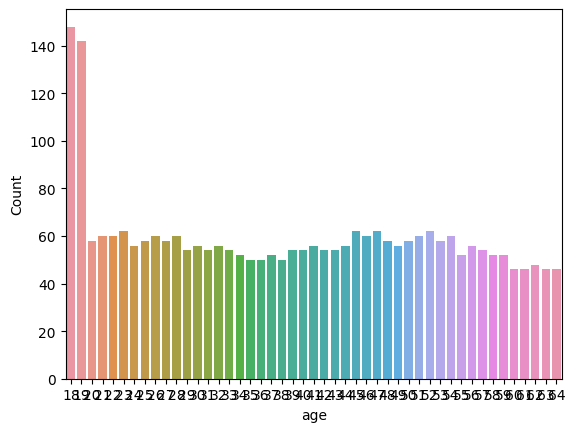

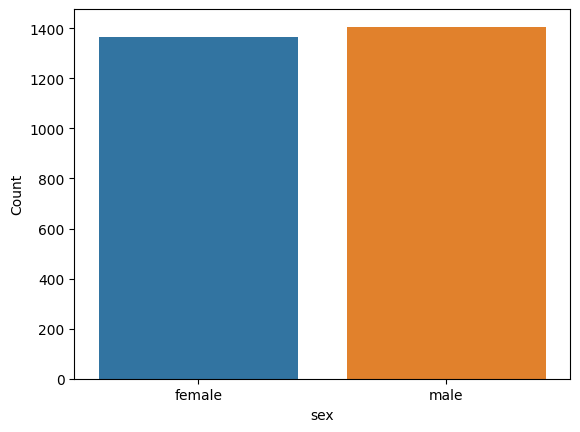

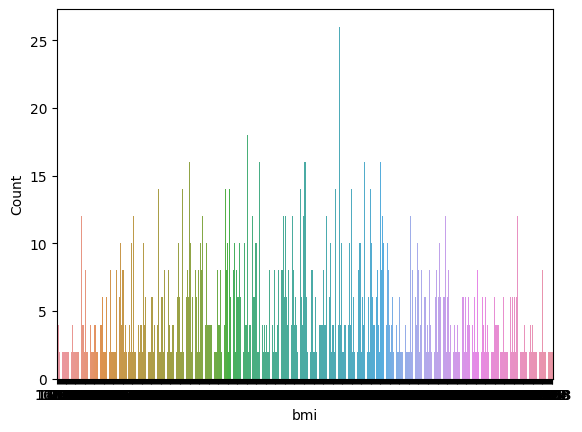

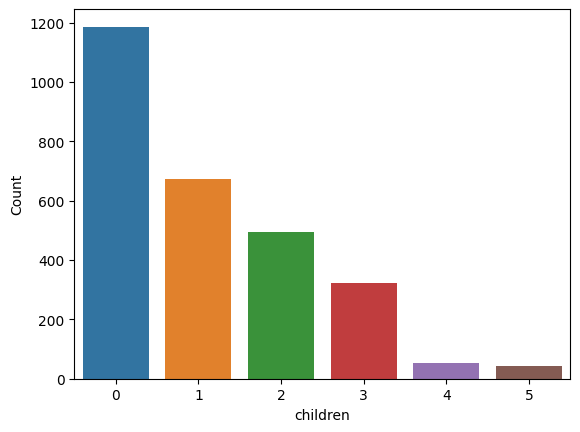

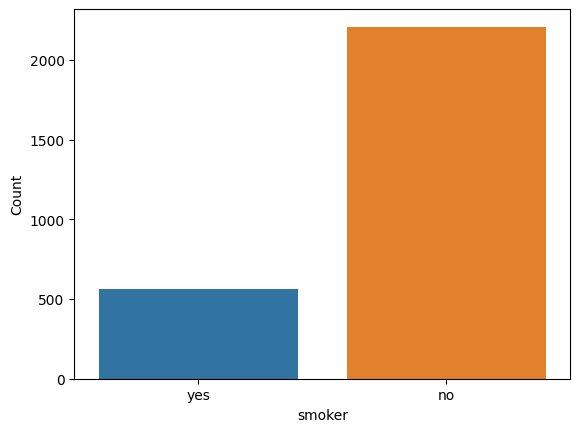

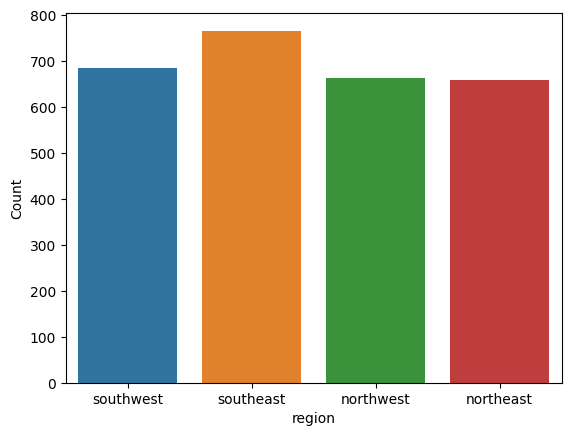

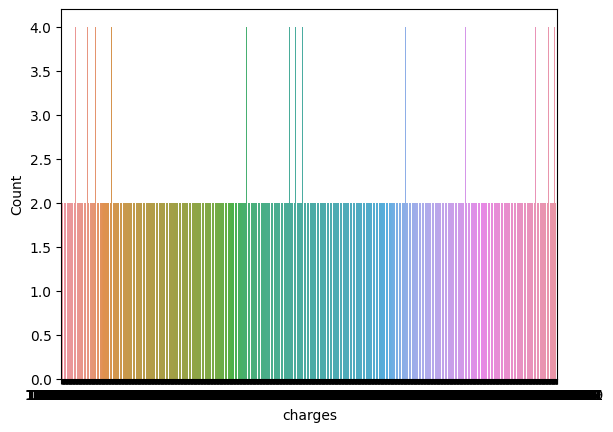

In [ ]:
for column in df.columns:
  # Assuming 'df' contains your DataFrame
  sns.countplot(x=column, data=df)
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.show()


In [ ]:
df["charges"].value_counts().sort_index(ascending=False)

63770.42801    2
62592.87309    2
60021.39897    2
58571.07448    2
55135.40209    2
              ..
1137.01100     2
1136.39940     2
1135.94070     4
1131.50660     2
1121.87390     4
Name: charges, Length: 1337, dtype: int64

In [ ]:
df["charges"].median()
LQR= df["charges"].quantile(0.20)
UQR= df["charges"].quantile(0.80)
IQR=UQR-LQR
max=UQR+1.5*IQR
min=LQR-1.5*IQR

dfn=df[df["charges"]<max]
dfn=dfn[dfn["charges"]>min]
dfn.shape
number_outliers=df.shape[0]-dfn.shape[0]
print("number of entries considered as outliers : ",number_outliers)

number of entries considered as outliers :  80


columns :sex, smoker and region are categorical variables

In [ ]:
df_sex=pd.get_dummies(dfn["sex"])
df_smoker=pd.get_dummies(dfn["smoker"])
df_region=pd.get_dummies(dfn["region"])
df_sex

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2767,1,0
2768,1,0
2769,0,1
2770,0,1


In [ ]:
dff.drop("sex",axis=1,inplace=True)
dff.drop("smoker",axis=1,inplace=True)
dff.drop("region",axis=1,inplace=True)


In [ ]:
dff=pd.concat([dfn,df_sex],axis=1)
dff=pd.concat([dff,df_smoker],axis=1)
dff=pd.concat([dff,df_region],axis=1)

In [ ]:
dff

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,47,45.320,1,8569.86180,1,0,1,0,0,0,1,0
2768,21,34.600,0,2020.17700,1,0,1,0,0,0,0,1
2769,19,26.030,1,16450.89470,0,1,0,1,0,1,0,0
2770,23,18.715,0,21595.38229,0,1,1,0,0,1,0,0


In [ ]:
dff.drop(["female","no"],axis=1,inplace=True)

In [ ]:
dff.rename(columns={"yes":"smoker"},inplace=True)

In [ ]:
dff

,age,bmi,children,charges,male,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2767,47,45.320,1,8569.86180,0,0,0,0,1,0
2768,21,34.600,0,2020.17700,0,0,0,0,0,1
2769,19,26.030,1,16450.89470,1,1,0,1,0,0
2770,23,18.715,0,21595.38229,1,0,0,1,0,0


Single Variable Regression

In [ ]:
lm=LinearRegression()

In [ ]:
dff["charges"]

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2692, dtype: float64

In [ ]:
X=dff["smoker"].values.reshape(-1,1)
print(X)

[[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [ ]:
X=dff["smoker"].values.reshape(-1,1)
Y=dff["charges"]

lm.fit(X,Y)
print(lm.score(X, Y))

0.5811702010218811


Multiple Linear Regression

In [ ]:
Z = dff[["age", "male", "bmi", "children", "smoker", "northwest","northeast","southwest","southwest"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.708912120782881


Pipeline

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8113322794893247


Model Refinement

Split the dataset into training and testing subsets assuming 20% of the data will be reserved for testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

Initializing Ridge Regressor

In [ ]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.7027799529119934


In [ ]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8160792651790887
